In [2]:
#클래식 머신러닝
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [3]:
print(iris_dataset.DESCR) #아이리스 데이터 설명 (iris_dataset['DESCR'] 같은방법)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
print('iris_dataset의 키:\n', iris_dataset.keys()) #iris 키 값

iris_dataset의 키:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [16]:
print('타깃의 이름\n' , iris_dataset['target_names']) #실제 데이터는 0,1,2로 되있음(numpy배열)

타깃의 이름
 ['setosa' 'versicolor' 'virginica']


In [17]:
print('타깃의 이름\n' , iris_dataset.feature_names)

타깃의 이름
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [22]:
print('data의 타입 :', type(iris_dataset.data))

data의 타입 : <class 'numpy.ndarray'>


In [23]:
print('data의 크기 :', iris_dataset['data'].shape)

data의 크기 : (150, 4)


In [26]:
print('data의 처음 다섯개 : \n', iris_dataset['data'][:5]) #슬라이싱 방법

data의 처음 다섯개 : 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [30]:
print('target의 타입 : ', type(iris_dataset['target']))

target의 타입 :  <class 'numpy.ndarray'>


In [32]:
print('target의 크기 : ', iris_dataset['target'].shape) #1차원 데이터

target의 크기 :  (150,)


In [35]:
print('target의 내용 : \n', iris_dataset['target']) #3가지 종류(numpy배열 구성)

target의 내용 : 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [40]:
#데이터의 준비(학습용, 테스트용)
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test, y_train, y_test = \
    train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.3) #데이터, 라벨을 주면 원하는만큼 잘라준다

In [55]:
print('x_train의 크기 : ', x_train.shape)
print('y_train의 크기 : ', y_train.shape)

x_train의 크기 :  (105, 4)
y_train의 크기 :  (105,)


In [56]:
print('x_test의 크기 : ', x_test.shape)
print('y_test의 크기 : ', y_test.shape)

x_test의 크기 :  (45, 4)
y_test의 크기 :  (45,)


In [59]:
#데이터의 시각화
import pandas as pd
import matplotlib.pyplot as plt


In [62]:
iris_dataframe = pd.DataFrame(x_train, columns=iris_dataset['feature_names'])

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

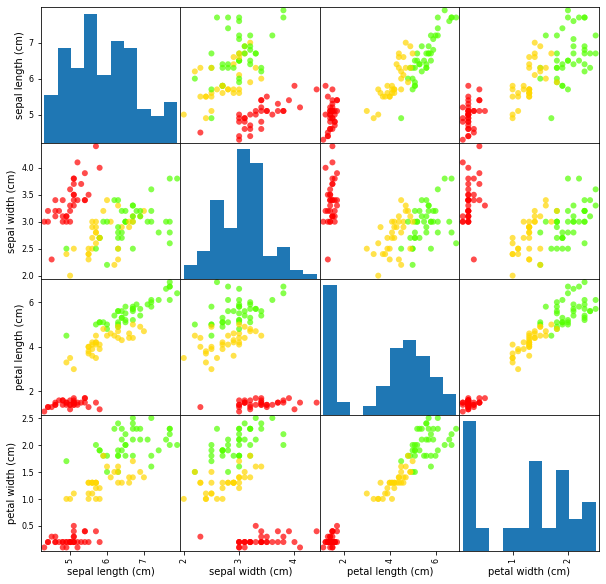

In [90]:
pd.plotting.scatter_matrix(iris_dataframe, figsize=(10,10), marker='o', c=y_train, cmap='prism', alpha=0.7)

In [91]:
#첫 번째 머신런이 모델 : k-최근접 알고리즘
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [93]:
knn.fit(x_train, y_train) #knn에 학습시키기

KNeighborsClassifier(n_neighbors=1)

In [98]:
# 예측하기
import numpy as np

x_new = np.array([[5, 2.9, 1, 0.2]]) # 예측용 샘플 데이터
x_new

array([[5. , 2.9, 1. , 0.2]])

In [100]:
prediction = knn.predict(x_new)
print('예측 :',prediction) #예측 값 
print('예측한 타깃의 이름 :', iris_dataset['target_names'][prediction]) #예측값에 맞는 꽃 이름

예측 : [0]
예측한 타깃의 이름 : ['setosa']


In [102]:
#모델의 평가
y_pred = knn.predict(x_test) #30%의 테스트값
print('테스트 세트에 대한 예츠그값 :\n',y_pred) 

테스트 세트에 대한 예츠그값 :
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


In [110]:
print('테스트 세트에 대한 정확도 :', np.mean(y_pred == y_test)* 100,'%') #y_pred 랑 y_test 값 이랑 일치률 비교(모델의 정확도 값)

테스트 세트에 대한 정확도 : 97.77777777777777 %


In [119]:
print('테스트 세트에 대한 정확도 :', round(knn.score(x_test, y_test),3) * 100,'%') #한번에 정확도 계산(더 좋은 방법)

테스트 세트에 대한 정확도 : 97.8 %
